# Cost Analysis of Eggs
Dates are from January 1st 2019 to December 31st 2024. Weighted averages are based on grade A Large eggs, both conventionally and organically produced and sold in the United States. The data source is https://marsapi.ams.usda.gov/. The data below is an exploration of the fluctuations in the cost of eggs in the last six years. This analysis does not explore the impact of global supply chain disruptions, labor shortages, or other external factors.

## Observations
The cost of eggs remained fairly stable from the beginning of 2019 to the first quarter of 2022 between 2.00 USD and 3.00 USD. The line graph shows significant spikes in the last quarter of 2022 and 2024. The average cost of eggs was 2.53 USD in 2019 and 3.85 USD in 2024. This represents a 52.9% increase over the time period. Inflation peaked at 7% in that time frame. 
  Note: I did not calculate the mode in the dataset due to working with weighted averages, the mode is not a reliable reflection of the 
            most frequently occuring datapoint. 

| Year |     Mean | Median | Variance | Standard Deviation | Standard Error of Mean |
|-----:|---------:|-------:|---------:|-------------------:|------------------------|
| 2019 | 2.537918 |   2.49 | 1.356717 |           1.164782 |               0.194130 |
| 2020 | 2.598919 |   2.50 | 1.309031 |           1.144129 |               0.190688 |
| 2021 | 2.624878 |   2.50 | 1.177113 |           1.084948 |               0.180825 |
| 2022 | 2.961832 |   2.99 | 1.428125 |           1.195042 |               0.199174 |
| 2023 | 3.263496 |   3.36 | 2.091872 |           1.446330 |               0.241055 |
| 2024 | 3.848729 |   3.99 | 3.265265 |           1.807004 |               0.301167 |

The box and whisker plot shows one outlier in 2020. This may have been caused by a brief uptick in prices due to COVID disruptions. Prices returned to normal in 2021. Prices spiked again in Quarter 4 of 2024. We are still feeling the effects of that spike today in Quarter 1 of 2025.

Contributers Nicolette Sorensen, Deborah Kisch, and Janice Guallpa analyzed the seasonal, regional, and organic vs conventional changes in the cost of eggs. Their analyses show the fluctions in the cost of eggs in November of 2024 that primarily affected conventionally raised eggs in the Midwest. See their analyses for detailed information. 

Contributer Kelley Blue shared her Bird Flu data. A combined bird flu and 6-year scatter plot shows the cost of eggs increase sharply when the Bird Flu outbreaks increase. These spikes are not consistent with inflation and primarily affect conventionally raised eggs. 

## Conclusions
In conclusion, we have found that the average cost of eggs has increased 52% between 2019 and 2024. We theorize that this increase was caused by more than inflation or COVID disruptions. The combined Bird Flu and Egg Prices scatter plot indicate there could be a corrlation between the cost of eggs and outbreaks of Bird Flu. Since bird flu is a fairly recent phenomenon in the United States, further analysis is needed. 

In [1]:
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Load the csv file
csv_path = Path("Resources/5_year_eggs.csv")
csv_path_2 = Path("Resources/USDA_Eggs_5_Years.csv")
csv_path_3 = Path("Resources/commercial-backyard-flocks.csv")

In [3]:
# Read in CSV file and create a DataFrame
usda_5y = pd.read_csv("Resources/USDA_Eggs_5_Years.csv")

# Remove columns
usda_5y.drop(['office_name', 'office_code', 'office_city', 'office_state', 'published_date', 'commodity', 'slug_id', 'slug_name',
                'report_title', 'final_ind', 'report_date', 'community', 'condition', 'price_unit', 'price_min', 'price_max'], axis=1, inplace=True)
# Filter for shell egg and package size 12
filtered_usda = usda_5y.loc[(usda_5y["section"] == "Shell Egg")]
filtered_usda = usda_5y.loc[(usda_5y["store_count"] > 0)]
filtered_usda

# Find the weighted data_frame for true average
weighted_usda = filtered_usda[["report_begin_date", "report_end_date", "region", "section", "type", "quality_grade", "package_size", "environment", "price_avg", "store_count"]]
weighted_usda["weighted"] = weighted_usda["price_avg"] * weighted_usda["store_count"] 
weighted_usda["weighted"]= weighted_usda["weighted"] / weighted_usda["store_count"].sum()

weighted_usda.head()

,report_begin_date,report_end_date,region,section,type,quality_grade,package_size,environment,price_avg,store_count,weighted
0,1/5/2019,1/11/2019,National,Shell Egg,WHITE LARGE,AA,NaN,Conventional,1.26,140.0,0.000033
1,1/5/2019,1/11/2019,National,Shell Egg,WHITE LARGE,AA,NaN,Conventional,2.24,188.0,0.000079
2,1/5/2019,1/11/2019,National,Shell Egg,WHITE EXTRA LARGE,A,NaN,Conventional,2.00,288.0,0.000108
3,1/5/2019,1/11/2019,National,Shell Egg,WHITE LARGE,A,NaN,Conventional,1.11,1404.0,0.000291
4,1/5/2019,1/11/2019,National,Shell Egg,WHITE LARGE,A,NaN,Conventional,2.61,231.0,0.000113


In [4]:
# Convert column report_end_date to datetime and extract the month and year
weighted_usda["report_end_date"] = pd.to_datetime(weighted_usda["report_end_date"], format="%m/%d/%Y")
weighted_usda["month"] = weighted_usda["report_end_date"].dt.month
weighted_usda["year"] = weighted_usda["report_end_date"].dt.year
weighted_usda.head()

,report_begin_date,report_end_date,region,section,type,quality_grade,package_size,environment,price_avg,store_count,weighted,month,year
0,1/5/2019,2019-01-11,National,Shell Egg,WHITE LARGE,AA,NaN,Conventional,1.26,140.0,0.000033,1,2019
1,1/5/2019,2019-01-11,National,Shell Egg,WHITE LARGE,AA,NaN,Conventional,2.24,188.0,0.000079,1,2019
2,1/5/2019,2019-01-11,National,Shell Egg,WHITE EXTRA LARGE,A,NaN,Conventional,2.00,288.0,0.000108,1,2019
3,1/5/2019,2019-01-11,National,Shell Egg,WHITE LARGE,A,NaN,Conventional,1.11,1404.0,0.000291,1,2019
4,1/5/2019,2019-01-11,National,Shell Egg,WHITE LARGE,A,NaN,Conventional,2.61,231.0,0.000113,1,2019


In [5]:
# start the weighted average calculation by multipling the avg and store count
group_year_month = weighted_usda[["price_avg", "store_count", "weighted", "month", "year"]]
group_year_month["weighted_yearly"] = weighted_usda["price_avg"] * weighted_usda["store_count"]
group_year_month.head()

/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/1053679360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_year_month["weighted_yearly"] = weighted_usda["price_avg"] * weighted_usda["store_count"]


,price_avg,store_count,weighted,month,year,weighted_yearly
0,1.26,140.0,0.000033,1,2019,176.40
1,2.24,188.0,0.000079,1,2019,421.12
2,2.00,288.0,0.000108,1,2019,576.00
3,1.11,1404.0,0.000291,1,2019,1558.44
4,2.61,231.0,0.000113,1,2019,602.91


In [6]:
# iterate over the rows and calculate the weighted average, group by month and year
weighted_year_month = group_year_month.groupby(["year", "month"]).apply(lambda x: x["weighted_yearly"].sum() / x["store_count"].sum()).reset_index()
# assign column names
weighted_year_month.columns = ["year", "month", "weighted_monthly"]
weighted_year_month.head()

/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/2934143590.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_year_month = group_year_month.groupby(["year", "month"]).apply(lambda x: x["weighted_yearly"].sum() / x["store_count"].sum()).reset_index()


,year,month,weighted_monthly
0,2019,1,2.477714
1,2019,2,2.681870
2,2019,3,2.624465
3,2019,4,2.530690
4,2019,5,2.241598


In [7]:
# create a new dataframe that combines the weighted average and the store count grouped by year and month
store_count_summary = group_year_month.groupby(['year', 'month'])['store_count'].sum().reset_index()
store_count_summary.head()

,year,month,store_count
0,2019,1,65665.0
1,2019,2,76943.0
2,2019,3,100942.0
3,2019,4,103933.0
4,2019,5,120812.0


In [8]:
year_month_summary = pd.merge(weighted_year_month, store_count_summary, on=["year", "month"], how="inner")
year_month_summary["Year and Month"] = pd.to_datetime(year_month_summary["month"].astype(str) + '-' + year_month_summary["year"].astype(str), dayfirst=True)
year_month_summary.set_index("Year and Month", inplace=True)
year_month_summary

/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/3390167591.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year_month_summary["Year and Month"] = pd.to_datetime(year_month_summary["month"].astype(str) + '-' + year_month_summary["year"].astype(str), dayfirst=True)


,year,month,weighted_monthly,store_count
Year and Month,,,,
2019-01-01,2019,1,2.477714,65665.0
2019-02-01,2019,2,2.681870,76943.0
2019-03-01,2019,3,2.624465,100942.0
2019-04-01,2019,4,2.530690,103933.0
2019-05-01,2019,5,2.241598,120812.0
...,...,...,...,...
2024-08-01,2024,8,3.030617,43560.0
2024-09-01,2024,9,4.564761,38530.0
2024-10-01,2024,10,5.256271,40006.0


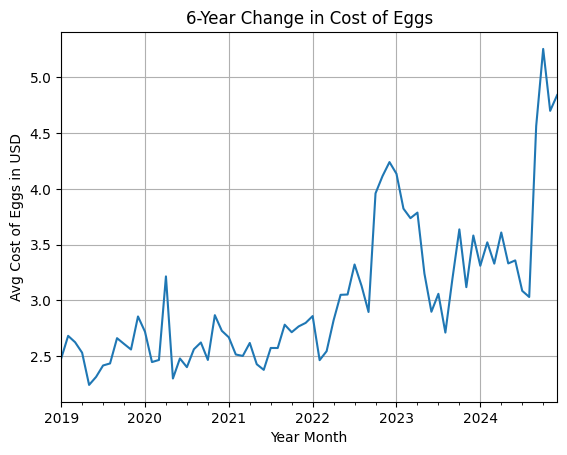

In [9]:
# Create a line graph of the change in cost in eggs over 5 years. 
year_month_summary.plot(kind="line", y="weighted_monthly", legend=False)
plt.xlabel("Year Month")
plt.ylabel("Avg Cost of Eggs in USD")
plt.title("6-Year Change in Cost of Eggs")
plt.grid(True)
# save the figure
plt.savefig("Resources/output_data/fig1_line.png")
plt.show()

In [10]:
# Print the dataframe for reference
group_year_month.head()

,price_avg,store_count,weighted,month,year,weighted_yearly
0,1.26,140.0,0.000033,1,2019,176.40
1,2.24,188.0,0.000079,1,2019,421.12
2,2.00,288.0,0.000108,1,2019,576.00
3,1.11,1404.0,0.000291,1,2019,1558.44
4,2.61,231.0,0.000113,1,2019,602.91


In [11]:
# Calculate the delta between the low and high point for each year
min_max = group_year_month.groupby("year")["price_avg"].agg(["min", "max"])
min_max["delta"] = min_max["max"] - min_max["min"]
min_max

,min,max,delta
year,,,
2019,0.29,6.91,6.62
2020,0.32,6.99,6.67
2021,0.47,6.99,6.52
2022,0.66,8.99,8.33
2023,0.49,13.69,13.20
2024,0.78,19.99,19.21


In [12]:
# Calculate the mean per year. Perform a weighted avg calculation grouped by year
mean = group_year_month.groupby(["year"]).apply(lambda x: x["weighted_yearly"].sum() / x["store_count"].sum(),
                                                                  include_groups=False)
mean.columns = ["year", "weighted avg per year"]
mean

year
2019    2.537918
2020    2.598919
2021    2.624878
2022    2.961832
2023    3.263496
2024    3.848729
dtype: float64

In [13]:
# Calculate the median per year. 
median = group_year_month.groupby("year")["price_avg"].median()
median.columns = ["median"]
median

year
2019    2.49
2020    2.50
2021    2.50
2022    2.99
2023    3.36
2024    3.99
Name: price_avg, dtype: float64

In [14]:
# Calculate the variance in the price average per year
var = group_year_month.groupby("year")["price_avg"].var()
var.columns = ["variance"]
var

year
2019    1.356717
2020    1.309031
2021    1.177113
2022    1.428125
2023    2.091872
2024    3.265265
Name: price_avg, dtype: float64

In [15]:
# Calculate the standard deviation of the price average
std_dev = group_year_month.groupby("year")["price_avg"].std()
std_dev.columns = ["Standard Deviation"]
std_dev

year
2019    1.164782
2020    1.144129
2021    1.084948
2022    1.195042
2023    1.446330
2024    1.807004
Name: price_avg, dtype: float64

In [16]:
# calculate the SEM for the dataset
sem = std_dev/np.sqrt(std_dev).count()
sem.columns = ["Standard Error of Mean"]
sem

year
2019    0.194130
2020    0.190688
2021    0.180825
2022    0.199174
2023    0.241055
2024    0.301167
Name: price_avg, dtype: float64

In [17]:
# Create a summary table
yearly_summary = ({"Mean": mean,
                   "Median": median,
                  "Variance": var,
                  "Standard Deviation": std_dev,
                  "Standard Error of Mean": sem})
yearly_summary_df = pd.DataFrame(yearly_summary)
yearly_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
year,,,,,
2019,2.537918,2.49,1.356717,1.164782,0.194130
2020,2.598919,2.50,1.309031,1.144129,0.190688
2021,2.624878,2.50,1.177113,1.084948,0.180825
2022,2.961832,2.99,1.428125,1.195042,0.199174
2023,3.263496,3.36,2.091872,1.446330,0.241055
2024,3.848729,3.99,3.265265,1.807004,0.301167


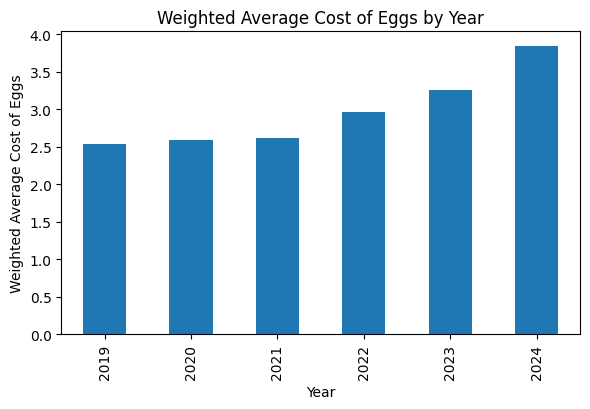

In [18]:
# Create a bar graph to represent the data
# I decided not to add the bar graph to the slides. The box plot was a better representation of the change. 
yearly_summary_compare = mean.plot(kind="bar", figsize=(6,4))
yearly_summary_compare.set_xlabel("Year")
yearly_summary_compare.set_ylabel("Weighted Average Cost of Eggs")

plt.tight_layout()
plt.title("Weighted Average Cost of Eggs by Year")

# save the figure
plt.savefig("Resources/output_data/fig2_bar.png")
plt.show()

In [19]:
# Print the dataframe for reference
year_month_summary.head()

,year,month,weighted_monthly,store_count
Year and Month,,,,
2019-01-01,2019,1,2.477714,65665.0
2019-02-01,2019,2,2.681870,76943.0
2019-03-01,2019,3,2.624465,100942.0
2019-04-01,2019,4,2.530690,103933.0
2019-05-01,2019,5,2.241598,120812.0


In [20]:
# Create a box and whisker plot to identify outliers
# Create empty list "prices" to fill with price_avg (for plotting)
price_avg_year = {}
outliers = {}
years = [2019, 2020, 2021, 2022, 2023, 2024]

    # Locate the rows for each year
for y in years:
    outliers[y] = []
    year_rows = year_month_summary[year_month_summary["year"] == y]

    quartiles = year_rows["weighted_monthly"].quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # add subset
    price_avg_year[y] = year_rows["weighted_monthly"].tolist()

    # Determine outliers using upper and lower bounds
    for p in price_avg_year[y]:
        if (p > upper_bound) or (p < lower_bound):
            outliers[y].append(p)

print(outliers)

{2019: [], 2020: [3.215346241650461], 2021: [], 2022: [], 2023: [], 2024: []}


In [21]:
outliers_series = pd.Series(outliers)

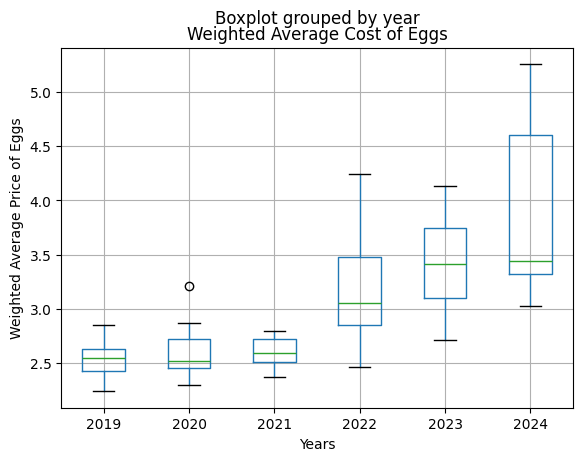

In [22]:
# Create the box and whisker plot
year_month_summary.boxplot(column="weighted_monthly", by="year")
plt.ylabel("Weighted Average Price of Eggs")
plt.xlabel("Years")
plt.title("Weighted Average Cost of Eggs")
plt.savefig("Resources/output_data/fig3_box.png")
plt.show()

## Bird Flu and 5 year Comparison

In [23]:
# Attepmt to make a line graph of the bird flu data
bf = pd.read_csv("Resources/commercial-backyard-flocks.csv")
# Filter dataframe to only commercial flocks
commercial_bf = bf.loc[(bf["Flock Type"] == "Commercial Table Egg Layer")]
# Break year and month to seperate columns
commercial_bf["Outbreak Date"] = pd.to_datetime(commercial_bf["Outbreak Date"])
commercial_bf["year"] = commercial_bf["Outbreak Date"].dt.year
commercial_bf["month"] = commercial_bf["Outbreak Date"].dt.month

commercial_bf.head()

/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/4106621456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_bf["Outbreak Date"] = pd.to_datetime(commercial_bf["Outbreak Date"])
/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/4106621456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_bf["year"] = commercial_bf["Outbreak Date"].dt.year
/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/4106621456.py:8: SettingWithCopyWarning: 
A valu

,County,State,Outbreak Date,Flock Type,Flock Size,year,month
0,Riverside,California,2024-12-31,Commercial Table Egg Layer,181300,2024,12
18,Sonoma,California,2023-12-28,Commercial Table Egg Layer,52400,2023,12
19,Sonoma,California,2023-12-28,Commercial Table Egg Layer,37300,2023,12
27,Darke,Ohio,2024-12-27,Commercial Table Egg Layer,931300,2024,12
42,Merced,California,2023-12-26,Commercial Table Egg Layer,709000,2023,12


In [24]:
yearly_summary = year_month_summary.reset_index()
yearly_summary.head()

,Year and Month,year,month,weighted_monthly,store_count
0,2019-01-01,2019,1,2.477714,65665.0
1,2019-02-01,2019,2,2.681870,76943.0
2,2019-03-01,2019,3,2.624465,100942.0
3,2019-04-01,2019,4,2.530690,103933.0
4,2019-05-01,2019,5,2.241598,120812.0


/var/folders/r8/0727psjx7xxc677bb6k0w6wh0000gp/T/ipykernel_50429/2424061649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_bf['Flock Size Scaled'] = commercial_bf['Flock Size'] / 1e6


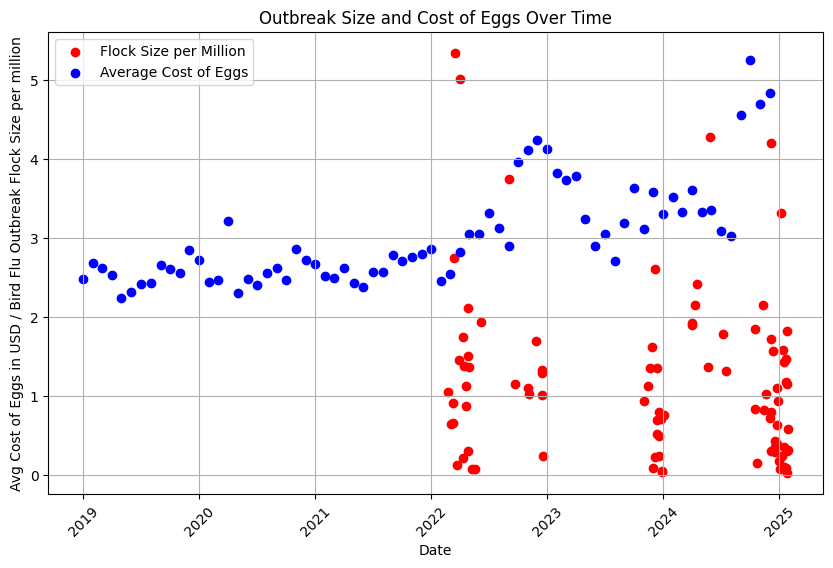

In [25]:
# Create a line scatter plot that shows both the weighted average cost of eggs and the combined outbreak numbers. 
#commercial_bf['Outbreak Date'] = pd.to_datetime(commercial_bf['Outbreak Date'], format='%Y-%m')
#yearly_summary['Year and Month'] = pd.to_datetime(year_month_summary['Year and Month'], format='%Y-%m')

# Scale down the outbreak_size by dividing by 1,000,000
commercial_bf['Flock Size Scaled'] = commercial_bf['Flock Size'] / 1e6

plt.figure(figsize=(10,6))

plt.scatter(commercial_bf["Outbreak Date"], commercial_bf["Flock Size Scaled"], color='r', label='Flock Size per Million')
plt.scatter(yearly_summary["Year and Month"],yearly_summary["weighted_monthly"], color='b', label='Average Cost of Eggs')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Avg Cost of Eggs in USD / Bird Flu Outbreak Flock Size per million')
plt.title('Outbreak Size and Cost of Eggs Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

# Display the plot
plt.savefig("Resources/output_data/fig4_scatter.png")
plt.show()